In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images to [0,1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Resize images from 28x28 to 32x32 by padding
x_train = np.pad(x_train, ((0,0), (2,2), (2,2)), mode='constant')
x_test = np.pad(x_test, ((0,0), (2,2), (2,2)), mode='constant')

# Reshape to (num_samples, 32, 32, 1)
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)

def LeNet5():
    model = models.Sequential([
        layers.Conv2D(6, (5,5), activation='tanh', padding='same', input_shape=(32,32,1)),
        layers.AvgPool2D((2,2), strides=2),
        layers.Conv2D(16, (5,5), activation='tanh'),
        layers.AvgPool2D((2,2), strides=2),
        layers.Conv2D(120, (5,5), activation='tanh'),
        layers.Flatten(),
        layers.Dense(84, activation='tanh'),
        layers.Dense(10, activation='softmax')  #output layer(0-9 digits)
    ])
    return model

# Create and compile the model
model = LeNet5()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test))

model.save("lenet5_mnist.h5")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8436 - loss: 0.5460 - val_accuracy: 0.9528 - val_loss: 0.1557
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9602 - loss: 0.1309 - val_accuracy: 0.9685 - val_loss: 0.1038
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9743 - loss: 0.0840 - val_accuracy: 0.9782 - val_loss: 0.0722
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9818 - loss: 0.0596 - val_accuracy: 0.9810 - val_loss: 0.0603
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9866 - loss: 0.0451 - val_accuracy: 0.9823 - val_loss: 0.0562
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9891 - loss: 0.0364 - val_accuracy: 0.9840 - val_loss: 0.0504
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9919 - loss: 0.0282 - val_accuracy: 0.9847 - val_loss: 0.0470
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9931 - loss: 0.0221 - val_accuracy: 0.

Saving Screenshot 2025-07-07 235109.png to Screenshot 2025-07-07 235109 (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


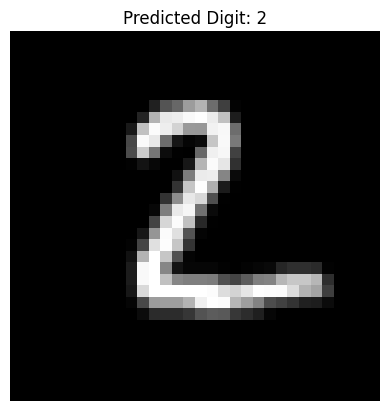

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files

# Load the trained model
model = tf.keras.models.load_model("lenet5_mnist.h5")

# Upload an image
uploaded = files.upload()

# Get the file name
image_path = list(uploaded.keys())[0]  # Store the uploaded filename

# Load the image as grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Use image_path instead of three.jpg

# Check if the image is 28x28
if image.shape != (28, 28):
    # Resize the image to 28x28 if it's not
    image = cv2.resize(image, (28, 28), interpolation=cv2.INTER_AREA)

# Resize from 28x28 to 32x32 by padding
image = np.pad(image, ((2, 2), (2, 2)), mode='constant', constant_values=0)

# Normalize (convert pixel values to range [0,1])
image = image / 255.0

# Reshape to match the input shape (1, 32, 32, 1)
image = image.reshape(1, 32, 32, 1)

# Predict
prediction = model.predict(image)
predicted_label = np.argmax(prediction)

# Display the image and prediction
plt.imshow(image.reshape(32, 32), cmap='gray')
plt.title(f"Predicted Digit: {predicted_label}")
plt.axis('off')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9835 - loss: 0.0585

Test accuracy: 0.9856
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


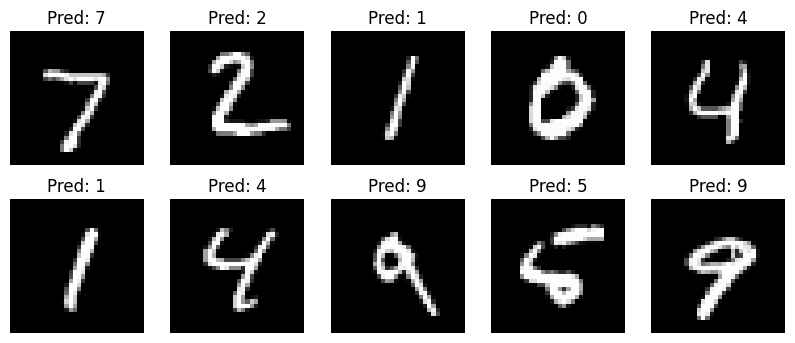

In [4]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

# Visualize predictions
predictions = model.predict(x_test[:10])
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(32,32), cmap='gray')  # Change to 32x32
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()


# Save the model
model.save("lenet5_mnist.h5")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


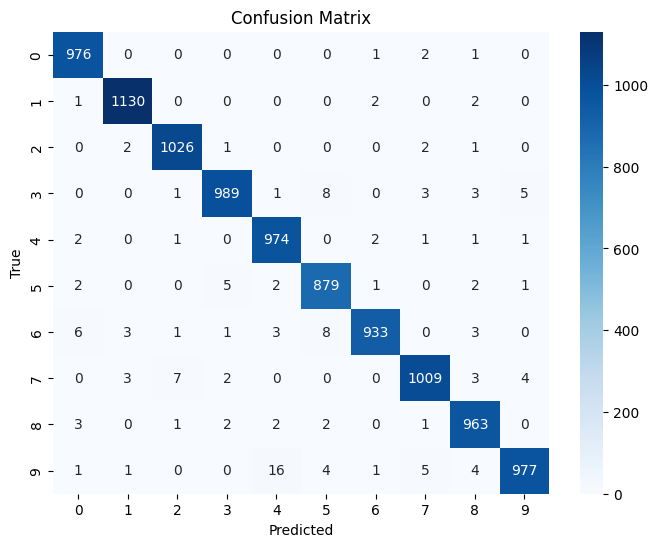

In [5]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = tf.keras.models.load_model("lenet5_mnist.h5")
# Make predictions on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [6]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_acc:.4f}")


test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


if train_acc > test_acc + 0.05:
    print(" Possible Overfitting Detected!")
else:
    print(" Model is Generalizing Well.")

Training Accuracy: 0.9976
Test Accuracy: 0.9856
 Model is Generalizing Well.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Treatment Equality Ratios per Class (Digit):
Digit 0: 0.2667
Digit 1: 0.5556
Digit 2: 0.5455
Digit 3: 1.9091
Digit 4: 0.3333
Digit 5: 0.5909
Digit 6: 3.5714
Digit 7: 1.3571
Digit 8: 0.5500
Digit 9: 2.9091
Significant bias detected across digit classes.


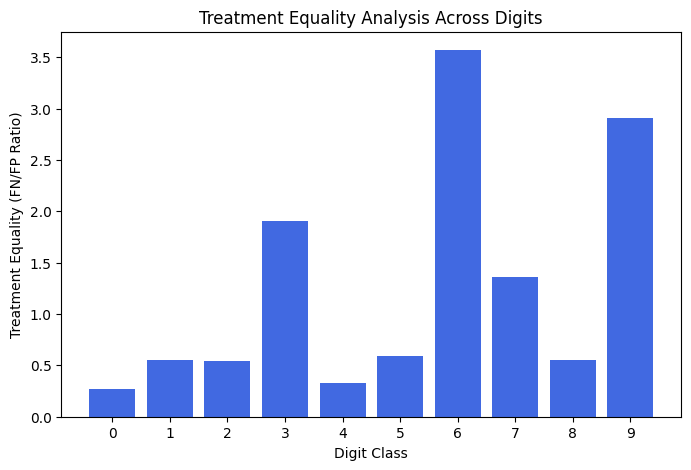

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get model predictions
y_pred = np.argmax(model.predict(x_test), axis=1)

def treatment_equality(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)  # Compute confusion matrix
    num_classes = cm.shape[0]  # Get number of classes
    ratios = {}

    for i in range(num_classes):  # Iterate over each class
        FN = np.sum(cm[i, :]) - cm[i, i]  # False Negatives (row sum minus correct)
        FP = np.sum(cm[:, i]) - cm[i, i]  # False Positives (column sum minus correct)

        if FP == 0:
            ratio = np.inf if FN > 0 else 1  # Handle division by zero case
        else:
            ratio = FN / FP

        ratios[i] = ratio  # Store Treatment Equality Ratio for each digit

    return ratios

treatment_eq_results = treatment_equality(y_test, y_pred)

# Print the ratios for each digit class (0-9)
print("Treatment Equality Ratios per Class (Digit):")
for digit, ratio in treatment_eq_results.items():
    print(f"Digit {digit}: {ratio:.4f}")

# Identify potential bias
max_diff = max(treatment_eq_results.values()) - min(treatment_eq_results.values())
if max_diff > 1.5:  # Adjust threshold based on your analysis
    print("Significant bias detected across digit classes.")
else:
    print("Model appears to have balanced Treatment Equality.")

import matplotlib.pyplot as plt

digits = list(treatment_eq_results.keys())
ratios = list(treatment_eq_results.values())

plt.figure(figsize=(8,5))
plt.bar(digits, ratios, color='royalblue')
plt.xlabel("Digit Class")
plt.ylabel("Treatment Equality (FN/FP Ratio)")
plt.title("Treatment Equality Analysis Across Digits")
plt.xticks(digits)
plt.show()


In [8]:
def overall_accuracy_equality(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    num_classes = cm.shape[0]  # Number of classes (digits)
    accuracies = {}

    for i in range(num_classes):
        TP = cm[i, i]  # True Positives
        FN = np.sum(cm[i, :]) - TP  # False Negatives
        FP = np.sum(cm[:, i]) - TP  # False Positives
        TN = np.sum(cm) - (TP + FN + FP)  # True Negatives

        accuracy = (TP + TN) / (TP + FP + TN + FN)  # Accuracy for the class
        accuracies[i] = accuracy

    return accuracies

# Compute Overall Accuracy Equality
overall_acc_results = overall_accuracy_equality(y_test, y_pred)

# Print results
print("Overall Accuracy per Class (Digit):")
for digit, acc in overall_acc_results.items():
    print(f"Digit {digit}: {acc:.4f}")

# Check fairness by computing max difference
max_diff_acc = max(overall_acc_results.values()) - min(overall_acc_results.values())
if max_diff_acc > 0.05:  # Threshold for fairness
    print("Significant accuracy differences detected across digit classes.")
else:
    print("Model maintains fairness in accuracy across digits.")


Overall Accuracy per Class (Digit):
Digit 0: 0.9981
Digit 1: 0.9986
Digit 2: 0.9983
Digit 3: 0.9968
Digit 4: 0.9968
Digit 5: 0.9965
Digit 6: 0.9968
Digit 7: 0.9967
Digit 8: 0.9969
Digit 9: 0.9957
Model maintains fairness in accuracy across digits.


In [9]:
def predictive_parity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    num_classes = cm.shape[0]  # Number of classes (digits)
    precisions = {}

    for i in range(num_classes):
        TP = cm[i, i]  # True Positives
        FP = np.sum(cm[:, i]) - TP  # False Positives

        if (TP + FP) == 0:
            precision = 1  # To handle division by zero
        else:
            precision = TP / (TP + FP)

        precisions[i] = precision

    return precisions

# Compute Predictive Parity
predictive_parity_results = predictive_parity(y_test, y_pred)

# Print results
print("\nPredictive Parity (Precision) per Class (Digit):")
for digit, precision in predictive_parity_results.items():
    print(f"Digit {digit}: {precision:.4f}")

# Check fairness by computing max difference
max_diff_prec = max(predictive_parity_results.values()) - min(predictive_parity_results.values())
if max_diff_prec > 0.05:  # Threshold for fairness
    print("Significant predictive parity differences detected across digit classes.")
else:
    print("Model maintains fairness in precision across digits.")



Predictive Parity (Precision) per Class (Digit):
Digit 0: 0.9849
Digit 1: 0.9921
Digit 2: 0.9894
Digit 3: 0.9890
Digit 4: 0.9760
Digit 5: 0.9756
Digit 6: 0.9926
Digit 7: 0.9863
Digit 8: 0.9797
Digit 9: 0.9889
Model maintains fairness in precision across digits.
